# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [4]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [5]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

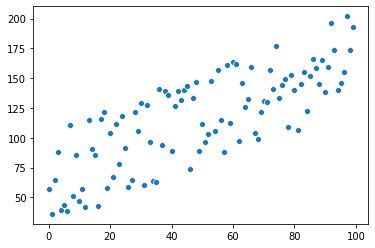

In [6]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1134.671799
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 823.369349
[1.91365352 1.83863948]
Iteration 2 | Cost: 786.670003
[1.91834033 1.94305513]
Iteration 3 | Cost: 782.305845
[1.92199249 1.97885462]
Iteration 4 | Cost: 781.749237
[1.92528951 1.99110843]
Iteration 5 | Cost: 781.640983
[1.92846455 1.99528252]
Iteration 6 | Cost: 781.585528
[1.93159764 1.99668406]
Iteration 7 | Cost: 781.536294
[1.93471622 1.99713419]
Iteration 8 | Cost: 781.487797
[1.93782973 1.99725784]
Iteration 9 | Cost: 781.439391
[1.94094139 1.99726947]
Iteration 10 | Cost: 781.391000
[1.94405231 1.99724265]
Iteration 11 | Cost: 781.342615
[1.94716287 1.99720265]
Iteration 12 | Cost: 781.294236
[1.95027321 1.99715812]
Iteration 13 | Cost: 781.245861
[1.95338336 1.99711204]
Iteration 14 | Cost: 781.197491
[1.95649335 1.99706543]
Iteration 15 | Cost: 781.149126
[1.95960318 1.99701864]
Iteration 16 | Cost: 781.100766
[1.96271285 1.99697179]
Iteration 17 | Cost: 781.052411
[1.96582237 1.99692493]
I

Iteration 647 | Cost: 751.543644
[3.89378437 1.96785793]
Iteration 648 | Cost: 751.498288
[3.89679589 1.96781253]
Iteration 649 | Cost: 751.452937
[3.89980726 1.96776713]
Iteration 650 | Cost: 751.407591
[3.90281848 1.96772173]
Iteration 651 | Cost: 751.362249
[3.90582955 1.96767633]
Iteration 652 | Cost: 751.316912
[3.90884047 1.96763094]
Iteration 653 | Cost: 751.271579
[3.91185123 1.96758555]
Iteration 654 | Cost: 751.226251
[3.91486184 1.96754016]
Iteration 655 | Cost: 751.180928
[3.91787229 1.96749477]
Iteration 656 | Cost: 751.135609
[3.9208826  1.96744938]
Iteration 657 | Cost: 751.090295
[3.92389275 1.967404  ]
Iteration 658 | Cost: 751.044985
[3.92690274 1.96735862]
Iteration 659 | Cost: 750.999680
[3.92991259 1.96731324]
Iteration 660 | Cost: 750.954380
[3.93292228 1.96726787]
Iteration 661 | Cost: 750.909084
[3.93593182 1.96722249]
Iteration 662 | Cost: 750.863793
[3.93894121 1.96717712]
Iteration 663 | Cost: 750.818506
[3.94195044 1.96713175]
Iteration 664 | Cost: 750.77322

Iteration 1017 | Cost: 735.072409
[4.99768178 1.95121498]
Iteration 1018 | Cost: 735.028725
[5.00063729 1.95117042]
Iteration 1019 | Cost: 734.985046
[5.00359265 1.95112586]
Iteration 1020 | Cost: 734.941370
[5.00654786 1.95108131]
Iteration 1021 | Cost: 734.897700
[5.00950292 1.95103675]
Iteration 1022 | Cost: 734.854033
[5.01245783 1.9509922 ]
Iteration 1023 | Cost: 734.810371
[5.01541259 1.95094766]
Iteration 1024 | Cost: 734.766714
[5.01836721 1.95090311]
Iteration 1025 | Cost: 734.723061
[5.02132167 1.95085857]
Iteration 1026 | Cost: 734.679412
[5.02427598 1.95081403]
Iteration 1027 | Cost: 734.635768
[5.02723014 1.95076949]
Iteration 1028 | Cost: 734.592128
[5.03018415 1.95072495]
Iteration 1029 | Cost: 734.548493
[5.03313802 1.95068042]
Iteration 1030 | Cost: 734.504862
[5.03609173 1.95063589]
Iteration 1031 | Cost: 734.461236
[5.03904529 1.95059136]
Iteration 1032 | Cost: 734.417614
[5.0419987  1.95054683]
Iteration 1033 | Cost: 734.373996
[5.04495197 1.9505023 ]
Iteration 1034

Iteration 1556 | Cost: 712.157950
[6.56915436 1.9275226 ]
Iteration 1557 | Cost: 712.116591
[6.57203013 1.92747925]
Iteration 1558 | Cost: 712.075237
[6.57490576 1.92743589]
Iteration 1559 | Cost: 712.033886
[6.57778124 1.92739254]
Iteration 1560 | Cost: 711.992540
[6.58065657 1.92734919]
Iteration 1561 | Cost: 711.951199
[6.58353176 1.92730584]
Iteration 1562 | Cost: 711.909861
[6.5864068 1.9272625]
Iteration 1563 | Cost: 711.868527
[6.5892817  1.92721915]
Iteration 1564 | Cost: 711.827198
[6.59215645 1.92717581]
Iteration 1565 | Cost: 711.785873
[6.59503105 1.92713247]
Iteration 1566 | Cost: 711.744552
[6.59790551 1.92708914]
Iteration 1567 | Cost: 711.703235
[6.60077982 1.9270458 ]
Iteration 1568 | Cost: 711.661923
[6.60365399 1.92700247]
Iteration 1569 | Cost: 711.620615
[6.60652801 1.92695914]
Iteration 1570 | Cost: 711.579311
[6.60940188 1.92691581]
Iteration 1571 | Cost: 711.538011
[6.61227561 1.92687248]
Iteration 1572 | Cost: 711.496715
[6.6151492  1.92682916]
Iteration 1573 |

Iteration 2057 | Cost: 691.954196
[7.99179221 1.90607414]
Iteration 2058 | Cost: 691.914887
[7.9945958  1.90603188]
Iteration 2059 | Cost: 691.875583
[7.99739924 1.90598961]
Iteration 2060 | Cost: 691.836283
[8.00020254 1.90594735]
Iteration 2061 | Cost: 691.796986
[8.00300569 1.90590508]
Iteration 2062 | Cost: 691.757694
[8.00580871 1.90586282]
Iteration 2063 | Cost: 691.718406
[8.00861158 1.90582057]
Iteration 2064 | Cost: 691.679121
[8.01141431 1.90577831]
Iteration 2065 | Cost: 691.639841
[8.0142169  1.90573606]
Iteration 2066 | Cost: 691.600564
[8.01701934 1.90569381]
Iteration 2067 | Cost: 691.561292
[8.01982165 1.90565156]
Iteration 2068 | Cost: 691.522023
[8.02262381 1.90560931]
Iteration 2069 | Cost: 691.482759
[8.02542583 1.90556707]
Iteration 2070 | Cost: 691.443498
[8.02822771 1.90552482]
Iteration 2071 | Cost: 691.404242
[8.03102944 1.90548258]
Iteration 2072 | Cost: 691.364989
[8.03383103 1.90544034]
Iteration 2073 | Cost: 691.325741
[8.03663248 1.90539811]
Iteration 2074

Iteration 2516 | Cost: 674.324558
[9.26379885 1.88689668]
Iteration 2517 | Cost: 674.287039
[9.26653789 1.88685539]
Iteration 2518 | Cost: 674.249523
[9.26927679 1.88681409]
Iteration 2519 | Cost: 674.212012
[9.27201555 1.8867728 ]
Iteration 2520 | Cost: 674.174504
[9.27475417 1.88673151]
Iteration 2521 | Cost: 674.137000
[9.27749266 1.88669023]
Iteration 2522 | Cost: 674.099499
[9.280231   1.88664894]
Iteration 2523 | Cost: 674.062003
[9.28296921 1.88660766]
Iteration 2524 | Cost: 674.024510
[9.28570727 1.88656638]
Iteration 2525 | Cost: 673.987022
[9.2884452 1.8865251]
Iteration 2526 | Cost: 673.949537
[9.29118299 1.88648383]
Iteration 2527 | Cost: 673.912055
[9.29392064 1.88644255]
Iteration 2528 | Cost: 673.874578
[9.29665815 1.88640128]
Iteration 2529 | Cost: 673.837105
[9.29939552 1.88636001]
Iteration 2530 | Cost: 673.799635
[9.30213275 1.88631874]
Iteration 2531 | Cost: 673.762169
[9.30486985 1.88627747]
Iteration 2532 | Cost: 673.724707
[9.3076068  1.88623621]
Iteration 2533 |

Iteration 3076 | Cost: 653.898641
[10.77611065  1.86409625]
Iteration 3077 | Cost: 653.863194
[10.77877295  1.86405611]
Iteration 3078 | Cost: 653.827751
[10.78143512  1.86401598]
Iteration 3079 | Cost: 653.792312
[10.78409715  1.86397584]
Iteration 3080 | Cost: 653.756877
[10.78675904  1.86393571]
Iteration 3081 | Cost: 653.721445
[10.7894208   1.86389558]
Iteration 3082 | Cost: 653.686016
[10.79208243  1.86385545]
Iteration 3083 | Cost: 653.650591
[10.79474392  1.86381533]
Iteration 3084 | Cost: 653.615170
[10.79740528  1.8637752 ]
Iteration 3085 | Cost: 653.579753
[10.8000665   1.86373508]
Iteration 3086 | Cost: 653.544339
[10.80272758  1.86369496]
Iteration 3087 | Cost: 653.508928
[10.80538853  1.86365484]
Iteration 3088 | Cost: 653.473521
[10.80804935  1.86361473]
Iteration 3089 | Cost: 653.438118
[10.81071003  1.86357461]
Iteration 3090 | Cost: 653.402718
[10.81337057  1.8635345 ]
Iteration 3091 | Cost: 653.367322
[10.81603098  1.86349439]
Iteration 3092 | Cost: 653.331930
[10.81

Iteration 3619 | Cost: 635.171030
[12.20204167  1.84259814]
Iteration 3620 | Cost: 635.137484
[12.20463161  1.8425591 ]
Iteration 3621 | Cost: 635.103942
[12.20722143  1.84252005]
Iteration 3622 | Cost: 635.070403
[12.20981111  1.84248101]
Iteration 3623 | Cost: 635.036867
[12.21240066  1.84244196]
Iteration 3624 | Cost: 635.003335
[12.21499008  1.84240293]
Iteration 3625 | Cost: 634.969806
[12.21757937  1.84236389]
Iteration 3626 | Cost: 634.936281
[12.22016853  1.84232485]
Iteration 3627 | Cost: 634.902759
[12.22275755  1.84228582]
Iteration 3628 | Cost: 634.869240
[12.22534645  1.84224679]
Iteration 3629 | Cost: 634.835725
[12.22793521  1.84220776]
Iteration 3630 | Cost: 634.802213
[12.23052385  1.84216873]
Iteration 3631 | Cost: 634.768704
[12.23311235  1.8421297 ]
Iteration 3632 | Cost: 634.735199
[12.23570072  1.84209068]
Iteration 3633 | Cost: 634.701698
[12.23828895  1.84205166]
Iteration 3634 | Cost: 634.668199
[12.24087706  1.84201264]
Iteration 3635 | Cost: 634.634705
[12.24

Iteration 4108 | Cost: 619.166675
[13.45297317  1.82373842]
Iteration 4109 | Cost: 619.134754
[13.45549964  1.82370033]
Iteration 4110 | Cost: 619.102835
[13.45802598  1.82366224]
Iteration 4111 | Cost: 619.070920
[13.4605522   1.82362416]
Iteration 4112 | Cost: 619.039008
[13.46307828  1.82358607]
Iteration 4113 | Cost: 619.007099
[13.46560424  1.82354799]
Iteration 4114 | Cost: 618.975194
[13.46813007  1.82350991]
Iteration 4115 | Cost: 618.943291
[13.47065577  1.82347183]
Iteration 4116 | Cost: 618.911392
[13.47318135  1.82343375]
Iteration 4117 | Cost: 618.879496
[13.47570679  1.82339568]
Iteration 4118 | Cost: 618.847604
[13.47823211  1.8233576 ]
Iteration 4119 | Cost: 618.815714
[13.4807573   1.82331953]
Iteration 4120 | Cost: 618.783828
[13.48328236  1.82328146]
Iteration 4121 | Cost: 618.751945
[13.48580729  1.8232434 ]
Iteration 4122 | Cost: 618.720066
[13.4883321   1.82320533]
Iteration 4123 | Cost: 618.688189
[13.49085678  1.82316727]
Iteration 4124 | Cost: 618.656316
[13.49

[14.61159207  1.80627046]
Iteration 4573 | Cost: 604.667139
[14.61405975  1.80623325]
Iteration 4574 | Cost: 604.636689
[14.61652731  1.80619605]
Iteration 4575 | Cost: 604.606242
[14.61899474  1.80615885]
Iteration 4576 | Cost: 604.575798
[14.62146204  1.80612165]
Iteration 4577 | Cost: 604.545357
[14.62392922  1.80608445]
Iteration 4578 | Cost: 604.514919
[14.62639628  1.80604726]
Iteration 4579 | Cost: 604.484484
[14.6288632   1.80601007]
Iteration 4580 | Cost: 604.454052
[14.63133001  1.80597288]
Iteration 4581 | Cost: 604.423624
[14.63379669  1.80593569]
Iteration 4582 | Cost: 604.393198
[14.63626324  1.8058985 ]
Iteration 4583 | Cost: 604.362776
[14.63872967  1.80586131]
Iteration 4584 | Cost: 604.332356
[14.64119597  1.80582413]
Iteration 4585 | Cost: 604.301940
[14.64366215  1.80578695]
Iteration 4586 | Cost: 604.271527
[14.6461282   1.80574977]
Iteration 4587 | Cost: 604.241117
[14.64859413  1.80571259]
Iteration 4588 | Cost: 604.210710
[14.65105993  1.80567542]
Iteration 4589

[15.73842906  1.78928165]
Iteration 5035 | Cost: 590.923121
[15.74083956  1.78924531]
Iteration 5036 | Cost: 590.894066
[15.74324994  1.78920897]
Iteration 5037 | Cost: 590.865013
[15.7456602   1.78917263]
Iteration 5038 | Cost: 590.835964
[15.74807034  1.78913629]
Iteration 5039 | Cost: 590.806917
[15.75048035  1.78909996]
Iteration 5040 | Cost: 590.777873
[15.75289024  1.78906363]
Iteration 5041 | Cost: 590.748832
[15.75530001  1.78902729]
Iteration 5042 | Cost: 590.719795
[15.75770965  1.78899097]
Iteration 5043 | Cost: 590.690760
[15.76011918  1.78895464]
Iteration 5044 | Cost: 590.661728
[15.76252858  1.78891831]
Iteration 5045 | Cost: 590.632699
[15.76493786  1.78888199]
Iteration 5046 | Cost: 590.603673
[15.76734701  1.78884567]
Iteration 5047 | Cost: 590.574650
[15.76975605  1.78880935]
Iteration 5048 | Cost: 590.545630
[15.77216496  1.78877303]
Iteration 5049 | Cost: 590.516612
[15.77457375  1.78873671]
Iteration 5050 | Cost: 590.487598
[15.77698242  1.7887004 ]
Iteration 5051

Iteration 5508 | Cost: 577.503829
[16.86740419  1.77226061]
Iteration 5509 | Cost: 577.476135
[16.8697574   1.77222513]
Iteration 5510 | Cost: 577.448444
[16.8721105   1.77218965]
Iteration 5511 | Cost: 577.420756
[16.87446347  1.77215418]
Iteration 5512 | Cost: 577.393071
[16.87681633  1.77211871]
Iteration 5513 | Cost: 577.365389
[16.87916907  1.77208324]
Iteration 5514 | Cost: 577.337709
[16.88152169  1.77204777]
Iteration 5515 | Cost: 577.310032
[16.88387418  1.7720123 ]
Iteration 5516 | Cost: 577.282358
[16.88622656  1.77197683]
Iteration 5517 | Cost: 577.254687
[16.88857882  1.77194137]
Iteration 5518 | Cost: 577.227018
[16.89093096  1.77190591]
Iteration 5519 | Cost: 577.199353
[16.89328299  1.77187045]
Iteration 5520 | Cost: 577.171690
[16.89563489  1.77183499]
Iteration 5521 | Cost: 577.144030
[16.89798667  1.77179953]
Iteration 5522 | Cost: 577.116373
[16.90033833  1.77176408]
Iteration 5523 | Cost: 577.088718
[16.90268988  1.77172862]
Iteration 5524 | Cost: 577.061067
[16.90

Iteration 6001 | Cost: 564.186086
[18.01317726  1.75498631]
Iteration 6002 | Cost: 564.159743
[18.01547233  1.75495171]
Iteration 6003 | Cost: 564.133404
[18.01776729  1.75491711]
Iteration 6004 | Cost: 564.107067
[18.02006214  1.75488251]
Iteration 6005 | Cost: 564.080733
[18.02235686  1.75484792]
Iteration 6006 | Cost: 564.054401
[18.02465147  1.75481332]
Iteration 6007 | Cost: 564.028073
[18.02694597  1.75477873]
Iteration 6008 | Cost: 564.001746
[18.02924034  1.75474414]
Iteration 6009 | Cost: 563.975423
[18.0315346   1.75470955]
Iteration 6010 | Cost: 563.949102
[18.03382875  1.75467496]
Iteration 6011 | Cost: 563.922784
[18.03612278  1.75464037]
Iteration 6012 | Cost: 563.896469
[18.03841669  1.75460579]
Iteration 6013 | Cost: 563.870156
[18.04071048  1.75457121]
Iteration 6014 | Cost: 563.843846
[18.04300416  1.75453663]
Iteration 6015 | Cost: 563.817538
[18.04529773  1.75450205]
Iteration 6016 | Cost: 563.791233
[18.04759117  1.75446747]
Iteration 6017 | Cost: 563.764931
[18.04

Iteration 6566 | Cost: 549.720682
[19.2915155   1.73571339]
Iteration 6567 | Cost: 549.695808
[19.29374571  1.73567977]
Iteration 6568 | Cost: 549.670936
[19.29597581  1.73564615]
Iteration 6569 | Cost: 549.646067
[19.29820579  1.73561253]
Iteration 6570 | Cost: 549.621200
[19.30043566  1.73557891]
Iteration 6571 | Cost: 549.596336
[19.30266542  1.73554529]
Iteration 6572 | Cost: 549.571475
[19.30489506  1.73551168]
Iteration 6573 | Cost: 549.546616
[19.30712459  1.73547806]
Iteration 6574 | Cost: 549.521759
[19.30935401  1.73544445]
Iteration 6575 | Cost: 549.496905
[19.31158332  1.73541084]
Iteration 6576 | Cost: 549.472054
[19.31381251  1.73537723]
Iteration 6577 | Cost: 549.447205
[19.31604159  1.73534363]
Iteration 6578 | Cost: 549.422358
[19.31827055  1.73531002]
Iteration 6579 | Cost: 549.397514
[19.32049941  1.73527642]
Iteration 6580 | Cost: 549.372673
[19.32272815  1.73524282]
Iteration 6581 | Cost: 549.347834
[19.32495677  1.73520922]
Iteration 6582 | Cost: 549.322998
[19.32

Iteration 7033 | Cost: 538.374825
[20.32080628  1.72019525]
Iteration 7034 | Cost: 538.351102
[20.32298426  1.72016241]
Iteration 7035 | Cost: 538.327382
[20.32516213  1.72012958]
Iteration 7036 | Cost: 538.303664
[20.3273399   1.72009674]
Iteration 7037 | Cost: 538.279948
[20.32951755  1.72006391]
Iteration 7038 | Cost: 538.256235
[20.33169509  1.72003108]
Iteration 7039 | Cost: 538.232525
[20.33387251  1.71999825]
Iteration 7040 | Cost: 538.208816
[20.33604983  1.71996543]
Iteration 7041 | Cost: 538.185110
[20.33822704  1.7199326 ]
Iteration 7042 | Cost: 538.161407
[20.34040414  1.71989978]
Iteration 7043 | Cost: 538.137705
[20.34258113  1.71986696]
Iteration 7044 | Cost: 538.114007
[20.344758    1.71983414]
Iteration 7045 | Cost: 538.090310
[20.34693477  1.71980132]
Iteration 7046 | Cost: 538.066616
[20.34911143  1.7197685 ]
Iteration 7047 | Cost: 538.042925
[20.35128797  1.71973569]
Iteration 7048 | Cost: 538.019236
[20.35346441  1.71970288]
Iteration 7049 | Cost: 537.995549
[20.35

Iteration 7545 | Cost: 526.538313
[21.42159963  1.70359909]
Iteration 7546 | Cost: 526.515791
[21.42372175  1.7035671 ]
Iteration 7547 | Cost: 526.493272
[21.42584377  1.7035351 ]
Iteration 7548 | Cost: 526.470755
[21.42796568  1.70350311]
Iteration 7549 | Cost: 526.448240
[21.43008748  1.70347112]
Iteration 7550 | Cost: 526.425728
[21.43220918  1.70343914]
Iteration 7551 | Cost: 526.403218
[21.43433076  1.70340715]
Iteration 7552 | Cost: 526.380710
[21.43645224  1.70337517]
Iteration 7553 | Cost: 526.358204
[21.43857361  1.70334318]
Iteration 7554 | Cost: 526.335701
[21.44069488  1.7033112 ]
Iteration 7555 | Cost: 526.313200
[21.44281603  1.70327922]
Iteration 7556 | Cost: 526.290701
[21.44493708  1.70324724]
Iteration 7557 | Cost: 526.268204
[21.44705802  1.70321527]
Iteration 7558 | Cost: 526.245710
[21.44917886  1.70318329]
Iteration 7559 | Cost: 526.223218
[21.45129958  1.70315132]
Iteration 7560 | Cost: 526.200729
[21.4534202   1.70311935]
Iteration 7561 | Cost: 526.178241
[21.45

Iteration 8011 | Cost: 516.287023
[22.39893418  1.68886427]
Iteration 8012 | Cost: 516.265542
[22.40100671  1.68883302]
Iteration 8013 | Cost: 516.244063
[22.40307914  1.68880177]
Iteration 8014 | Cost: 516.222586
[22.40515146  1.68877053]
Iteration 8015 | Cost: 516.201111
[22.40722368  1.68873929]
Iteration 8016 | Cost: 516.179638
[22.40929579  1.68870805]
Iteration 8017 | Cost: 516.158168
[22.4113678   1.68867681]
Iteration 8018 | Cost: 516.136700
[22.4134397   1.68864557]
Iteration 8019 | Cost: 516.115234
[22.4155115   1.68861434]
Iteration 8020 | Cost: 516.093770
[22.41758319  1.6885831 ]
Iteration 8021 | Cost: 516.072308
[22.41965478  1.68855187]
Iteration 8022 | Cost: 516.050849
[22.42172626  1.68852064]
Iteration 8023 | Cost: 516.029391
[22.42379764  1.68848941]
Iteration 8024 | Cost: 516.007936
[22.42586891  1.68845818]
Iteration 8025 | Cost: 515.986483
[22.42794007  1.68842696]
Iteration 8026 | Cost: 515.965032
[22.43001113  1.68839573]
Iteration 8027 | Cost: 515.943584
[22.43

Iteration 8391 | Cost: 508.279120
[23.17897194  1.67710399]
Iteration 8392 | Cost: 508.258452
[23.18100489  1.67707334]
Iteration 8393 | Cost: 508.237785
[23.18303774  1.6770427 ]
Iteration 8394 | Cost: 508.217121
[23.18507048  1.67701205]
Iteration 8395 | Cost: 508.196458
[23.18710313  1.6769814 ]
Iteration 8396 | Cost: 508.175798
[23.18913567  1.67695076]
Iteration 8397 | Cost: 508.155140
[23.1911681   1.67692012]
Iteration 8398 | Cost: 508.134484
[23.19320043  1.67688948]
Iteration 8399 | Cost: 508.113830
[23.19523267  1.67685884]
Iteration 8400 | Cost: 508.093178
[23.19726479  1.6768282 ]
Iteration 8401 | Cost: 508.072528
[23.19929682  1.67679757]
Iteration 8402 | Cost: 508.051881
[23.20132874  1.67676693]
Iteration 8403 | Cost: 508.031235
[23.20336055  1.6767363 ]
Iteration 8404 | Cost: 508.010591
[23.20539227  1.67670567]
Iteration 8405 | Cost: 507.989950
[23.20742388  1.67667504]
Iteration 8406 | Cost: 507.969311
[23.20945539  1.67664441]
Iteration 8407 | Cost: 507.948674
[23.21

Iteration 8915 | Cost: 497.731154
[24.23022765  1.66125469]
Iteration 8916 | Cost: 497.711556
[24.23220726  1.66122485]
Iteration 8917 | Cost: 497.691960
[24.23418677  1.661195  ]
Iteration 8918 | Cost: 497.672365
[24.23616618  1.66116516]
Iteration 8919 | Cost: 497.652773
[24.23814549  1.66113532]
Iteration 8920 | Cost: 497.633183
[24.24012469  1.66110548]
Iteration 8921 | Cost: 497.613595
[24.2421038   1.66107564]
Iteration 8922 | Cost: 497.594008
[24.24408281  1.66104581]
Iteration 8923 | Cost: 497.574424
[24.24606171  1.66101597]
Iteration 8924 | Cost: 497.554842
[24.24804052  1.66098614]
Iteration 8925 | Cost: 497.535261
[24.25001922  1.66095631]
Iteration 8926 | Cost: 497.515683
[24.25199783  1.66092647]
Iteration 8927 | Cost: 497.496107
[24.25397633  1.66089665]
Iteration 8928 | Cost: 497.476532
[24.25595474  1.66086682]
Iteration 8929 | Cost: 497.456960
[24.25793304  1.66083699]
Iteration 8930 | Cost: 497.437390
[24.25991124  1.66080717]
Iteration 8931 | Cost: 497.417821
[24.26

Iteration 9478 | Cost: 487.006116
[25.32900577  1.64468892]
Iteration 9479 | Cost: 486.987606
[25.33092962  1.64465991]
Iteration 9480 | Cost: 486.969098
[25.33285338  1.64463091]
Iteration 9481 | Cost: 486.950592
[25.33477704  1.64460191]
Iteration 9482 | Cost: 486.932088
[25.3367006   1.64457291]
Iteration 9483 | Cost: 486.913586
[25.33862407  1.64454391]
Iteration 9484 | Cost: 486.895085
[25.34054743  1.64451491]
Iteration 9485 | Cost: 486.876587
[25.3424707   1.64448591]
Iteration 9486 | Cost: 486.858090
[25.34439387  1.64445692]
Iteration 9487 | Cost: 486.839595
[25.34631695  1.64442793]
Iteration 9488 | Cost: 486.821103
[25.34823992  1.64439893]
Iteration 9489 | Cost: 486.802611
[25.3501628   1.64436994]
Iteration 9490 | Cost: 486.784122
[25.35208558  1.64434096]
Iteration 9491 | Cost: 486.765635
[25.35400826  1.64431197]
Iteration 9492 | Cost: 486.747150
[25.35593085  1.64428298]
Iteration 9493 | Cost: 486.728666
[25.35785334  1.644254  ]
Iteration 9494 | Cost: 486.710184
[25.35

[26.22254279  1.63121747]
Iteration 9949 | Cost: 478.492644
[26.2244213   1.63118915]
Iteration 9950 | Cost: 478.474998
[26.22629972  1.63116083]
Iteration 9951 | Cost: 478.457354
[26.22817805  1.63113251]
Iteration 9952 | Cost: 478.439712
[26.23005627  1.63110419]
Iteration 9953 | Cost: 478.422072
[26.23193441  1.63107588]
Iteration 9954 | Cost: 478.404433
[26.23381245  1.63104756]
Iteration 9955 | Cost: 478.386796
[26.23569039  1.63101925]
Iteration 9956 | Cost: 478.369161
[26.23756824  1.63099094]
Iteration 9957 | Cost: 478.351528
[26.23944599  1.63096263]
Iteration 9958 | Cost: 478.333896
[26.24132364  1.63093432]
Iteration 9959 | Cost: 478.316266
[26.24320121  1.63090601]
Iteration 9960 | Cost: 478.298638
[26.24507867  1.63087771]
Iteration 9961 | Cost: 478.281012
[26.24695604  1.6308494 ]
Iteration 9962 | Cost: 478.263388
[26.24883332  1.6308211 ]
Iteration 9963 | Cost: 478.245765
[26.2507105  1.6307928]
Iteration 9964 | Cost: 478.228144
[26.25258758  1.6307645 ]
Iteration 9965 |

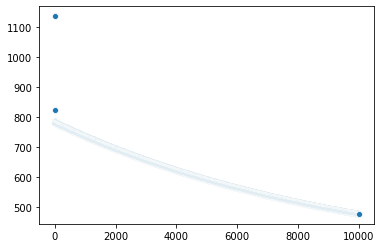

In [7]:
numEpochs= 10000
alpha = 0.0002
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise